# Exercise 6 - Visualisation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Question 1
Create a bar chart of Pokemon species introduced by generation.

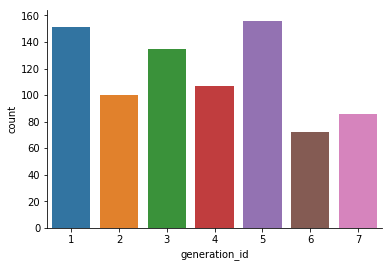

In [3]:
# data setup
pokemon = pd.read_csv('../data/pokemon.csv')
fuel_econ = pd.read_csv('../data/fuel_econ.csv')
sns.countplot(data = pokemon, x = 'generation_id')
sns.set
sns.despine()

In [44]:
# Inspect Data
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


## Question 2
Create a histogram of Pokemon special defense values.

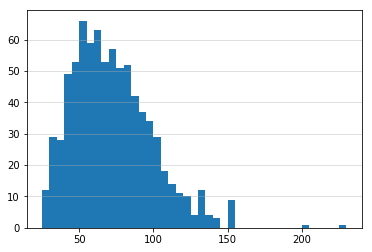

In [45]:
# Create histogram
bins = np.arange(25, pokemon['special-defense'].max()+1, 5)
plt.hist(pokemon['special-defense'], bins)
plt.grid(axis ='y', alpha=0.5)

## Question 3

Ceate a histogram of Pokemon heights and weights.

There's a very long tail of Pokemon heights. Here, I've focused in on Pokemon of height 6 meters or less, so that I can use a smaller bin size to get a more detailed look at the main data distribution.

Text(0, 0.5, 'Number of Pokémon')

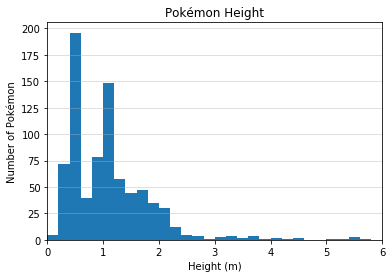

In [47]:
# Histogram of Pokémon height
bins = np.arange(0, pokemon['height'].max(), .2)
plt.hist(pokemon['height'], bins)
plt.xlim(0,6)
plt.grid(axis='y', alpha=0.5)
plt.title('Pokémon Height')
plt.xlabel('Height (m)')
plt.ylabel('Number of Pokémon')

([<matplotlib.axis.XTick at 0xd433208>,
 <a list of 9 Text xticklabel objects>)

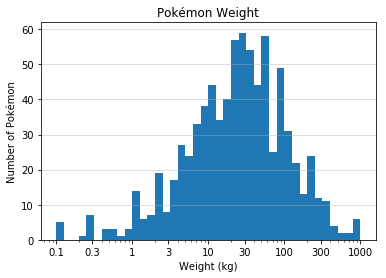

In [48]:
# Histogram of Pokémon height
bins = 10 ** np.arange(-1, 3.0+0.1, 0.1)

plt.hist(pokemon['weight'], bins)
plt.grid(axis='y', alpha=0.5)
plt.title('Pokémon Weight')
plt.xlabel('Weight (kg)')
plt.ylabel('Number of Pokémon')
plt.xscale('log')

ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
plt.xticks(ticks, ['{}'.format(val) for val in ticks])

## Question 4
Create a scatterplot of city vs. highway fuel mileage.

In [60]:
# Check dtypes
fuel_econ.dtypes

id             int64
make          object
model         object
year           int64
VClass        object
drive         object
trans         object
fuelType      object
cylinders      int64
displ        float64
pv2            int64
pv4            int64
city         float64
UCity        float64
highway      float64
UHighway     float64
comb         float64
co2            int64
feScore        int64
ghgScore       int64
dtype: object

Text(0.5, 1.0, 'City vs. Highway Fuel Mileage')

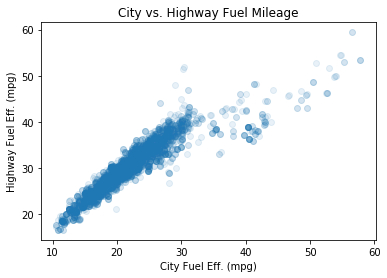

In [61]:
# Create scatterplot
plt.scatter(fuel_econ['city'], fuel_econ['highway'], alpha=0.1)
plt.xlabel('City Fuel Eff. (mpg)')
plt.ylabel('Highway Fuel Eff. (mpg)')
plt.title('City vs. Highway Fuel Mileage')

## Question 5
Create a heat map of engine displacement vs. co2 production. Try to interpret results you see.

Text(0, 0.5, 'CO2 (g/mi)')

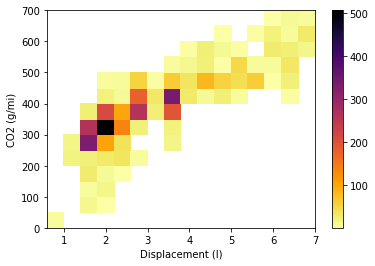

In [62]:
# Create heat map
bins_x = np.arange(0.6, fuel_econ['displ'].max() + .4, .4)
bins_y = np.arange(0, fuel_econ['co2'].max() + 50, 50)

cmap = plt.cm.jet
cmap.set_under('w', 1)

plt.hist2d(fuel_econ['displ'], fuel_econ['co2'], [bins_x, bins_y], cmap = 'inferno_r', cmin=0.1)
plt.colorbar()
plt.xlabel('Displacement (l)')
plt.ylabel('CO2 (g/mi)')

## Question 6
Plot the relationship between vehicle class and engine displacement.

In [63]:
# Fuel Econ Types
fuel_econ.dtypes

id             int64
make          object
model         object
year           int64
VClass        object
drive         object
trans         object
fuelType      object
cylinders      int64
displ        float64
pv2            int64
pv4            int64
city         float64
UCity        float64
highway      float64
UHighway     float64
comb         float64
co2            int64
feScore        int64
ghgScore       int64
dtype: object

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

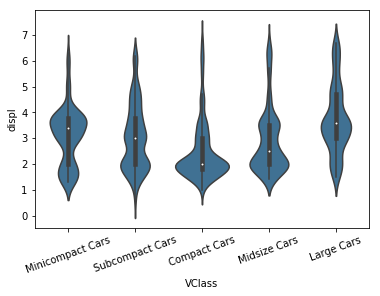

In [64]:
# I couldn't find the actual color value so I found the hex via Paint.Net :P
colorChart = '#3274A1'

# Create Violin Plot
carOrder = ['Minicompact Cars','Subcompact Cars','Compact Cars','Midsize Cars','Large Cars']
sns.violinplot(data=fuel_econ, x='VClass', y='displ', order=carOrder, color=colorChart)
plt.xticks(rotation=20)

## Question 7
Plot the average combined fuel efficiency for each manufacturer with at least 80 cars.

In [66]:
# Find out the total number of cars per make from the data
carCount = fuel_econ['make'].value_counts()
carCount

BMW                  523
Mercedes-Benz        269
Porsche              235
Ford                 218
Chevrolet            212
Audi                 201
MINI                 201
Volkswagen           174
Hyundai              158
Dodge                140
Lexus                125
Kia                  124
Cadillac             118
Toyota               116
Infiniti             108
Honda                101
Jaguar                98
Mazda                 87
Nissan                71
Buick                 66
Subaru                60
Chrysler              58
Lincoln               52
Volvo                 50
Acura                 46
Bentley               45
Mitsubishi            44
Rolls-Royce           42
Maserati              39
Scion                 27
Fiat                  26
Ferrari               23
Genesis               17
Aston Martin          15
Suzuki                13
Roush Performance     10
Lotus                 10
Alfa Romeo             6
Karma                  1
Name: make, dtype: int64

In [67]:
# Set minimum and seperate the manufactures that have at least the minimum
minimum = 80
qualifiedMakeIndex = np.sum(carCount > minimum)
qualifiedMakeCars = carCount.index[:qualifiedMake]
qualifiedMakeCars

Index(['BMW', 'Mercedes-Benz', 'Porsche', 'Ford', 'Chevrolet', 'Audi', 'MINI',
       'Volkswagen', 'Hyundai', 'Dodge', 'Lexus', 'Kia', 'Cadillac', 'Toyota',
       'Infiniti', 'Honda', 'Jaguar', 'Mazda'],
      dtype='object')

In [69]:
# Find the average and order the list appropriately
carsList = fuel_econ.loc[fuel_econ['make'].isin(qualifiedMakeCars)]
carsMean = carsList.groupby('make').mean()
carsOrdered = carsMean.sort_values('comb', ascending=False).index

Text(0.5, 0, 'Average Combined Fuel Eff. (mpg)')

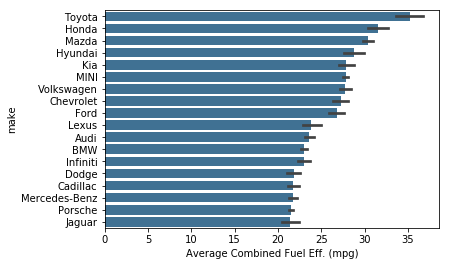

In [70]:
# Plot the data
sns.barplot(data = carsList, x = 'comb', y = 'make', order = carsOrdered, color = colorChart)
plt.xlabel('Average Combined Fuel Eff. (mpg)')